In [104]:
#Modified from:
#https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

# load vgg model
from keras.applications.vgg19 import VGG19
# load the model
model = VGG19()
# summarize the model
model.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

"\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Conv2D, Flatten,AveragePooling2D\nfrom keras import optimizers\n\nmodel = Sequential()\nmodel.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))\nmodel.add(AveragePooling2D())\nmodel.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))\nmodel.add(AveragePooling2D())\nmodel.add(Flatten())\nmodel.add(Dense(units=120, activation='relu'))\nmodel.add(Dense(units=84, activation='relu'))\nmodel.add(Dense(units=10, activation = 'softmax'))\nmodel.summary()\n"

In [102]:
n=0
for layer in model.layers:
  print(n,layer.name)
  n+=1

0 conv2d_8
1 average_pooling2d_8
2 conv2d_9
3 average_pooling2d_9
4 flatten_4
5 dense_12
6 dense_13
7 dense_14


In [103]:
n=0
for layer in model.layers:
  if 'conv' in layer.name:
    filters, biases = layer.get_weights()
    print(n,layer.name, filters.shape, biases.shape)
  n+=1

0 conv2d_8 (3, 3, 1, 6) (6,)
2 conv2d_9 (3, 3, 6, 16) (16,)


Color channels:  3
Filter size:  3 3
Total number of filters :  64


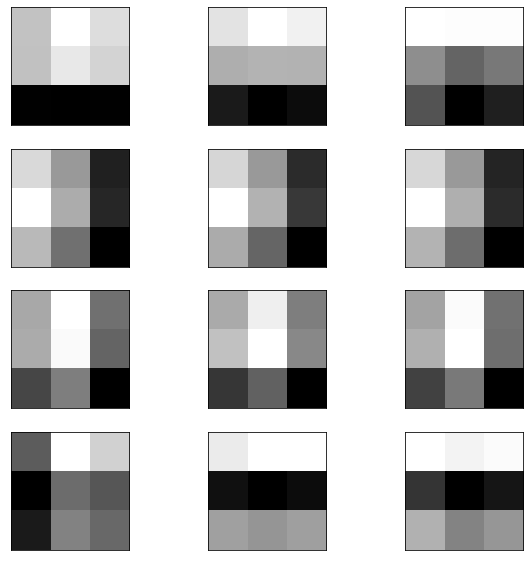

In [105]:
from matplotlib import pyplot
# retrieve weights from the first hidden layer
n = 1
filters, biases = model.layers[n].get_weights()
s = filters.shape 
print("Color channels: ", s[0])
print("Filter size: ", s[1],s[2])
print("Total number of filters : ", s[3])
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
#n_filters, ix = s[3], 1
n_filters, ix = 4, 1

pyplot.figure(figsize=(10,10))
for i in range(n_filters):
	# get the filter
  f = filters[:, :, :, i]
  
  # plot each channel separately
  for j in range(s[0]):
    ax = pyplot.subplot(n_filters, s[0], ix)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(f[j,:, :], cmap='gray')
    ix += 1
# show the figure
pyplot.show()

In [108]:
def plot_feature_maps(feature_maps):
  # plot all feature maps 
  col = 8
  row = int(feature_maps.shape[3]/col)
  ix = 1
  plt.figure(figsize=(20,20))
  for _ in range(row):
    for _ in range(col):
      # specify subplot and turn of axis
      ax = plt.subplot(row, col, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
      ix += 1
  # show the figure
  plt.show()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
Feature maps:  (1, 224, 224, 64)


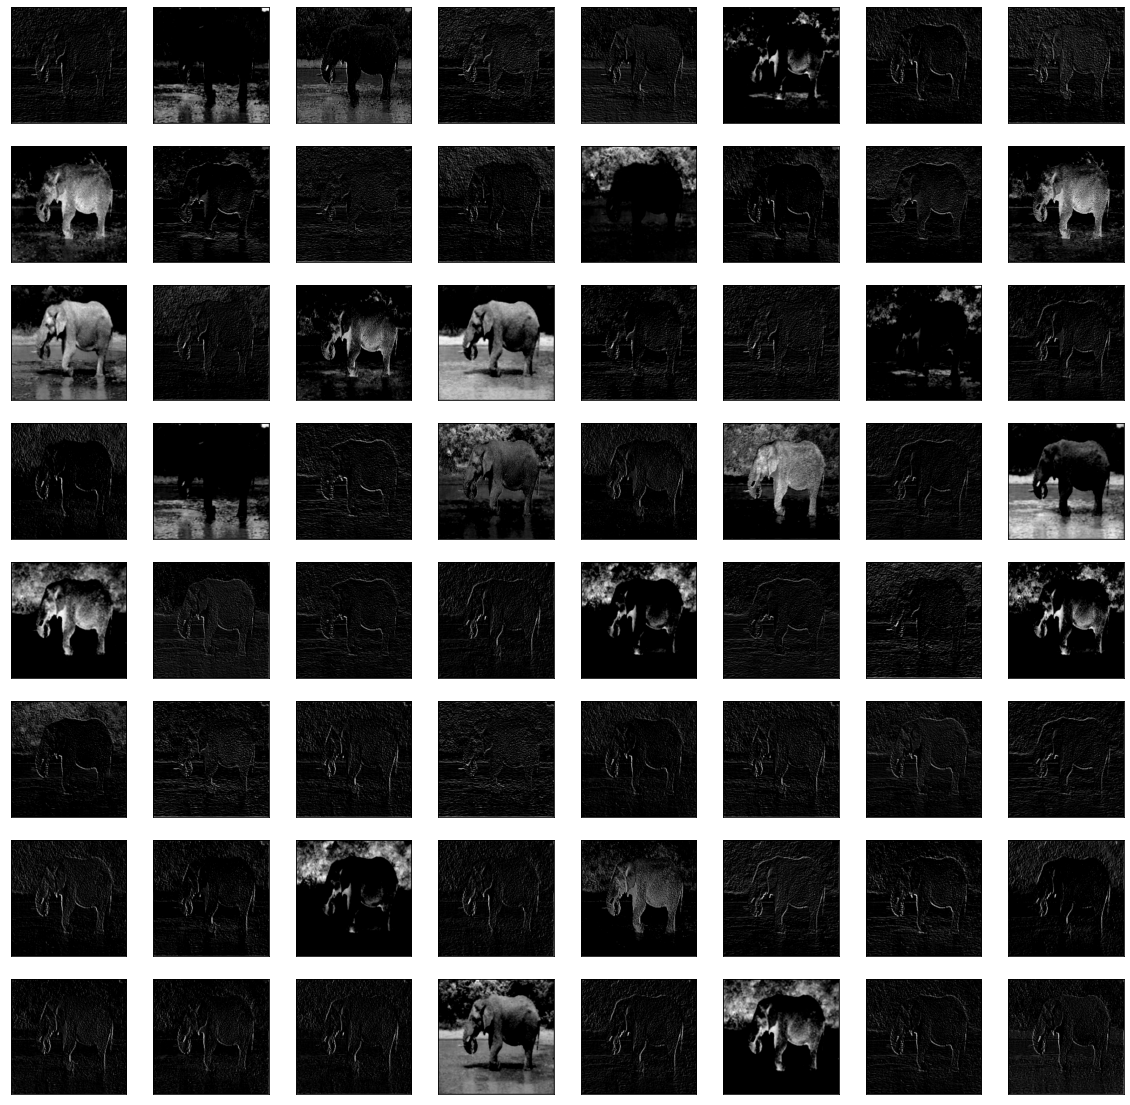

In [107]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims
# load the model
model = VGG19()
#Select the hidde layer to visualize
n = 1
# redefine model to output right after the hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[n].output)
model.summary()

# load the image with the required shape
img = load_img('Elephant.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
print("Feature maps: ", feature_maps.shape)
#plot all the feature maps
plot_feature_maps(feature_maps)